# Twitter sentiment analysis

- José Francisco Pacheco Quintana A01373488
- Uriel Fuentes Cavazos A00820592
- Eloy Hernández Lúa A01066325
- Yasuo Ignacio Maidana Perez A01328427

Liberías y módulos a importar

In [1]:
import nltk
import random
import pickle
import json
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.corpus import movie_reviews
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from matplotlib import style

Si no se tienen instalados los paquetes adicionales de la librería nltk, se instalan con la siguiente celda:

In [2]:
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Se dejó esta celda a propósito para detener el jupyter notebook. Después de esta celda, se muestra el procedimiento para obtener los modelos ya entrenados. Para ver los modelos funcionando, se puede correr el jupyter [Aquí](#cell)

In [ ]:
assert x = 1

Preparando el dataset para entrenamiento. Se puede utilizar otro dataset para entrenar las funciones. Se recomienda tener los ejemplos positivos y negativos en archivos diferentes para que estos puedan ser importados y utilizados con las siguiente celdas

In [ ]:
short_pos = open('positive.txt', 'r').read()
short_neg = open('negative.txt', 'r').read()

In [ ]:
documents = []

for r in short_pos.split('\n'):
    documents.append( (r, 'pos') )

for r in short_neg.split('\n'):
    documents.append( (r, 'neg') )

all_words = []

short_pos_words = word_tokenize(short_pos)
short_neg_words = word_tokenize(short_neg)

for w in short_pos_words:
    all_words.append(w.lower())
    
for w in short_neg_words:
    all_words.append(w.lower())

In [ ]:
all_words = nltk.FreqDist(all_words)
word_features = list(all_words.keys())[:5000]

In [ ]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
        
    return features

In [ ]:
featuresets= [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)

In [ ]:
training_set = featuresets[:10000]
testing_set = featuresets[10000:]

<h5>Modelos</h5>

A continuación se presentan los modelos a utilizar para la clasificación de tweets. Estas celdas toman tiempo en correr, dependiendo del tamaño de los batches de entrenamiento y de testing, por lo que se recomienda cargar los modelos ya preentrenados.

Original nltk Naive Bayes classifier

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
print('Naive Bayes Algorithm accuracy percent:', (nltk.classify.accuracy(classifier, testing_set))*100)

Multinomial Naive Bayes classifier

In [ ]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print('MNB_classifier accuracy percent:', (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

Bernoulli Naive Bayes classifier

In [ ]:
BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print('BernoulliNB_classifier accuracy percent:', (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

Logistic Regression classifier

In [ ]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print('LogisticRegression_classifier accuracy percent:', (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

Stochastic Vector Machine, with stochastic gradient descent, classifier

In [ ]:
SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print('SGDClassifier_classifier accuracy percent:', (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

Linear Support Vector Machine classifier

In [ ]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print('LinearSVC_classifier accuracy percent:', (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

Nu Support Vector Machine classifier

In [ ]:
NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print('NuSVC_classifier accuracy percent:', (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)

Voting system: takes a vote from each of the classifiers and it will classify the input as positive or negative

In [ ]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [ ]:
voted_classifier = VoteClassifier(classifier, 
                                  NuSVC_classifier, 
                                  LinearSVC_classifier, 
                                  SGDClassifier_classifier, 
                                  MNB_classifier, 
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

In [ ]:
print('voted_classifier accuracy percent:', (nltk.classify.accuracy(voted_classifier, testing_set))*100)

In [ ]:
print('Classification:', voted_classifier.classify(testing_set[1][0]), 'Confidence%:', voted_classifier.confidence(testing_set[0][0]))
print('Classification:', voted_classifier.classify(testing_set[2][0]), 'Confidence%:', voted_classifier.confidence(testing_set[1][0]))
print('Classification:', voted_classifier.classify(testing_set[3][0]), 'Confidence%:', voted_classifier.confidence(testing_set[2][0]))
print('Classification:', voted_classifier.classify(testing_set[4][0]), 'Confidence%:', voted_classifier.confidence(testing_set[3][0]))
print('Classification:', voted_classifier.classify(testing_set[5][0]), 'Confidence%:', voted_classifier.confidence(testing_set[4][0]))
print('Classification:', voted_classifier.classify(testing_set[6][0]), 'Confidence%:', voted_classifier.confidence(testing_set[5][0]))
print('Classification:', voted_classifier.classify(testing_set[7][0]), 'Confidence%:', voted_classifier.confidence(testing_set[6][0]))


In [ ]:
all_words = []
documents = []

In [ ]:
#J = adjective, R = adverb, V = verb
#allowed_word_types = ['J', 'R', 'V']
allowed_word_types = ['J']

for p in short_pos.split('\n'):
    documents.append( (p, 'pos') )
    words = word_tokenize(p)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

for p in short_neg.split('\n'):
    documents.append( (p, 'neg') )
    words = word_tokenize(p)
    neg = nltk.pos_tag(words)
    for w in neg:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

In [ ]:
save_documents = open('pickled_algos/documents.pickle', 'wb')
pickle.dump(documents, save_documents)
save_documents.close()

In [ ]:
docu = open('pickled_algos/documents.pickle', 'rb')
doc = pickle.load(docu)
docu.close()

In [ ]:
all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:5000]

Guardando los modelos

In [ ]:
save_word_features = open('pickled_algos/word_features5k.pickle', 'wb')
pickle.dump(word_features, save_word_features)
save_word_features.close()

In [ ]:
save_classifier = open('pickled_algos/originalNB.pickle', 'wb')
pickle.dump(classifier, save_classifier)
save_classifier.close()

In [ ]:
save_classifier = open('pickled_algos/BernoulliNB.pickle', 'wb')
pickle.dump(BernoulliNB_classifier, save_classifier)
save_classifier.close()

In [ ]:
save_classifier = open('pickled_algos/LogisticReg.pickle', 'wb')
pickle.dump(LogisticRegression_classifier, save_classifier)
save_classifier.close()

In [ ]:
save_classifier = open('pickled_algos/MultinomialNB.pickle', 'wb')
pickle.dump(MNB_classifier, save_classifier)
save_classifier.close()

In [ ]:
save_classifier = open('pickled_algos/LinearSVC.pickle', 'wb')
pickle.dump(LinearSVC_classifier, save_classifier)
save_classifier.close()

<a id='cell'></a>
<h2>Correr desde aquí</h2>

In [2]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
        
    return features

Esta clase contiene el sistema de votación, el cual utiliza los modelos preentrados para clasificar tweets como positivos o negativos.

In [3]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers
    
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

Se importa el dataset que se utilizaron para entrenar los modelos.

In [4]:
documents_f = open ('pickled_algos/documents.pickle', 'rb')
documents = pickle.load(documents_f)
documents_f.close()

In [5]:
word_features5k_f = open('pickled_algos/word_features5k.pickle', 'rb')
word_features = pickle.load(word_features5k_f)
word_features5k_f.close()

Se importan los modelos para el sistema de votación, estos fueron preentrenados, como se puede ver en las celdas de arriba. Son 5 a fin de evitar un empate durante la votación.

In [6]:
open_file = open('pickled_algos/originalNB.pickle', 'rb')
classifier = pickle.load(open_file)
open_file.close()

In [7]:
open_file = open('pickled_algos/MultinomialNB.pickle', 'rb')
MNB_classifier = pickle.load(open_file)
open_file.close()

C:\Users\yasuo\.conda\envs\computer_vision\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\yasuo\.conda\envs\computer_vision\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.preprocessing.label module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.preprocessing. Anything that cannot be imported from sklearn.preprocessing is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\yasuo\.conda\envs\computer_vision\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\

In [8]:
open_file = open('pickled_algos/BernoulliNB.pickle', 'rb')
BernoulliNB_classifier = pickle.load(open_file)
open_file.close()

C:\Users\yasuo\.conda\envs\computer_vision\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator BernoulliNB from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
open_file = open('pickled_algos/LogisticReg.pickle', 'rb')
LogisticRegression_classifier = pickle.load(open_file)
open_file.close()

C:\Users\yasuo\.conda\envs\computer_vision\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\yasuo\.conda\envs\computer_vision\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [10]:
open_file = open('pickled_algos/LinearSVC.pickle', 'rb')
LinearSVC_classifier = pickle.load(open_file)
open_file.close()

C:\Users\yasuo\.conda\envs\computer_vision\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\yasuo\.conda\envs\computer_vision\lib\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator LinearSVC from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


La función llama al clasificador de comentarios y determina si el texto introducido es positivo o negativo.

In [11]:
def sentiment(text):
    feats = find_features(text)
    
    return voted_classifier.classify(feats), voted_classifier.confidence(feats)

In [12]:
voted_classifier = VoteClassifier(classifier,
                                  LinearSVC_classifier, 
                                  MNB_classifier, 
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

Ejemplos:

In [13]:
print(sentiment('This movie was awesome! The acting was great, plot was wonderful, and there were pythons'))
print(sentiment('This movie was utter junk. There were absolutely 0 pythons. I do not see what the point was at all'))

('pos', 1.0)
('neg', 1.0)


En esta celda se llama a la API de Twitter, para recabar tweets y analizarlos con la función sentiment. La celda se detiene luego de 20 segundos, pero este tiempo puede ser modificado si se desea adquirir una mayor o menor cantidad de tweets (en la función 'on_data'). De no existir el límite de tiempo, la celda correría indefinidamente y la ejecución tendría que detenerse manualmente. Las clasificaciones con una confianza superior al 80% son enviadas a un archivo 'twitter-out.txt', el cual sirve para graficar el sentimiento. En twitterstream.filter.track() se especifica el término que la API de twitter va a filtrar.

In [14]:
#consumer key, consumer secret, access token, access secret.
ckey="yNQvbItoIh2KM6CvvzGAYHUee"
csecret="GQb43q0jjSKDgrZjJwt4V4pFJMNHBySbkYZmujyL0JSkTByDBx"
atoken="3310850076-IZaW3mqt8meusAQk3XGgojsNekzK4sr9bpbgxBv"
asecret="p8U14zI4dzf6hx57MPGeitlFuquocbnsxuXgGWGyiqIbh"

class listener(StreamListener):

    def __init__(self):
        self.start_time = time.time()
    
    def on_data(self, data):
        if (time.time() - self.start_time) < 20: 
            all_data = json.loads(data)

            tweet = all_data["text"]
            sentiment_value, confidence = sentiment(tweet)
            print(tweet, sentiment_value, confidence)
        
            if confidence*100 >= 80:
                output = open('twitter-out.txt', 'a')
                output.write(sentiment_value)
                output.write('\n')
                output.close()

            return True
        else:
            return False

    def on_error(self, status):
        print(status)

        
auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())

twitterStream.filter(track=["happy"])

@Hae__baee Happy Mark Lee Day!!🥳
tq for the giveawayy

#HappyMarkDay
#MarkInOurHearts
#마크_생일이라_날이_MARK다… https://t.co/Qkc40YEBVE neg 0.8
RT @NTRFansCampaign: Happy Birthday Rockstar @ThisIsDSP From @tarak9999 Fans

#NannakuPrematho Title Song Will Stay In Our Hearts For Ever… neg 0.8
RT @SpiritOfCongres: Happy friendship day 🎆 

#ModiCronyBhaiBhai https://t.co/WCBJ5tlphe neg 0.8
RT @JJHLOOKS: happy birthday mark!
#HappyMarkDay
#MarkInOurHearts
#스물둘_마크가_빛날_시간 https://t.co/eVMWRrSH5j pos 0.8
@StoudemireAmar happy national gf day bby pos 0.8
RT @Larc92: Dragon
For now here is a mini project I did with @austinbatchart for Dragon Trapper's Lodge. 
I'm happy that I got a fantastic… pos 0.8
@__S_H_A_W__ Happy prendshipday mawaaa🥵🥵
#RiseOfPanIndiaStarPrabhas
#Prabhas #RadheShyam neg 0.8
RT @urstrulyMahesh: Happy birthday, rockstar @ThisIsDSP!! Keep ruling the charts with your phenomenal music. Have a great day!! Stay safe 🤗… pos 1.0
RT @jasdestinyy: happy national gfs day 😌@anthony_gurtler pos

RT @NOLIMITLAF7ARE: I said #HAPPY #NATIONAL #GIRLFRIEND #DAY https://t.co/Xcp7sE5dZo neg 0.8


KeyError: 'text'

Esta celda grafica el output de la celda anterior. Si hay tweets negativos, la línea baja, si hay tweets positivos, la linea sube. En el video, Sentdex menciona que el algoritmo de clasificación tiene un sesgo hacia la clasificación de tweets como negativos, además de que luego de revisar más de cerca los tweets, se puede observar que incluso clasifica tweets que no están en inglés, por lo tanto, se modificó el decremento que ocurre cuando hay tweets negativos. 

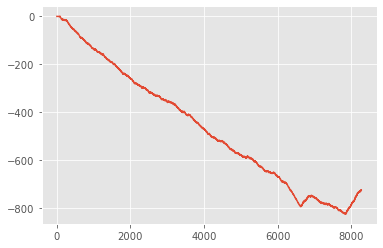

In [15]:
style.use('ggplot')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out.txt","r").read()
    lines = pullData.split('\n')
    
    xar = []
    yar = []
    
    x = 0
    y = 0
    
    for l in lines:
        x += 1
        if 'pos' in l:
            y += 1
        elif 'neg' in l:
            y -= 0.3
        xar.append(x)
        yar.append(y)
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()